# Import Packages

In [42]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

from anaysis.src.bivariate_analysis import BivariateAnalyzer, CategoricalVsNumericalAnalysis
from anaysis.src.feature_engineering import FeatureEngineer, DateFeatureEngineeringStrategy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

# Loading data

In [43]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
data = pd.concat([train_data, test_data], sort=False)

# Exploratory Data Analysis
## Date Ranges

In [44]:
print(f"Min Date: {data['date'].min()}")
print(f"Max Date: {data['date'].max()}")

Min Date: 2013-01-01
Max Date: 2018-03-31


#### Key Observations
- The data spans from January 1, 2013 to March 31, 2018.
- The range covers approximately 5+ years, suggesting a relatively long observation period.

## Shape of DataFrame

In [45]:
print(data.shape)

(958000, 5)


#### Key Observations
- The dataset comprises 958,000 records and 5 features, providing a substantial volume of data for analysis. Each record represents an observation, and the 5 features offer key attributes to explore relationships, trends, and patterns within the data

## Data Types

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    958000 non-null  object 
 1   store   958000 non-null  int64  
 2   item    958000 non-null  int64  
 3   sales   913000 non-null  float64
 4   id      45000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 43.9+ MB
None


#### Key Insights
- The `date` column is currently of object type and should be converted to datetime for proper analysis.

## Data Type Conversion

In [47]:
data['date'] = pd.to_datetime(data['date'])

## Unique values for each feature

In [48]:
data.nunique()

date      1916
store       10
item        50
sales      213
id       45000
dtype: int64

#### Key Observations
- The dataset comprises 1,916 unique dates, 10 distinct stores, 50 unique items, and 213 unique sales values. This rich structure enables a detailed analysis of sales patterns over time, item performance across different stores, and trends in sales values.

## Observing first and last 5 entries

In [49]:
print(data.head())
print(data.tail())

        date  store  item  sales  id
0 2013-01-01      1     1   13.0 NaN
1 2013-01-02      1     1   11.0 NaN
2 2013-01-03      1     1   14.0 NaN
3 2013-01-04      1     1   13.0 NaN
4 2013-01-05      1     1   10.0 NaN
            date  store  item  sales       id
44995 2018-03-27     10    50    NaN  44995.0
44996 2018-03-28     10    50    NaN  44996.0
44997 2018-03-29     10    50    NaN  44997.0
44998 2018-03-30     10    50    NaN  44998.0
44999 2018-03-31     10    50    NaN  44999.0


#### Key Insights
- Sales Column: `NaN` values at the end represent missing target values in the test dataset, which need to be predicted.
- ID Column: Missing `id` values in the train set are expected since they are not required for model training.
## Descriptive Statistics

In [50]:
print(data.describe().T)

          count                           mean                  min                  25%                  50%                  75%                  max           std
date     958000  2015-08-16 11:59:59.999999744  2013-01-01 00:00:00  2014-04-24 18:00:00  2015-08-16 12:00:00  2016-12-07 06:00:00  2018-03-31 00:00:00           NaN
store  958000.0                            5.5                  1.0                  3.0                  5.5                  8.0                 10.0      2.872283
item   958000.0                           25.5                  1.0                 13.0                 25.5                 38.0                 50.0     14.430877
sales  913000.0                      52.250287                  0.0                 30.0                 47.0                 70.0                231.0     28.801144
id      45000.0                        22499.5                  0.0             11249.75              22499.5             33749.25              44999.0  12990.525394


#### Key Insights
- **Missing Sales Data:** The discrepancy in sales count (913,000 vs. 958,000) confirms missing sales values in the test dataset.
- **Sales Distribution:** Sales are right-skewed, as the mean (52.25) is greater than the median (47.0). This suggests that while most sales hover around 30–70, there are some higher sales values (up to 231) contributing to the skew.
- **Even Distribution of Stores and Items:** Both store and item values are evenly spread across their respective ranges, which is useful for balanced analysis.

## Sales by Store

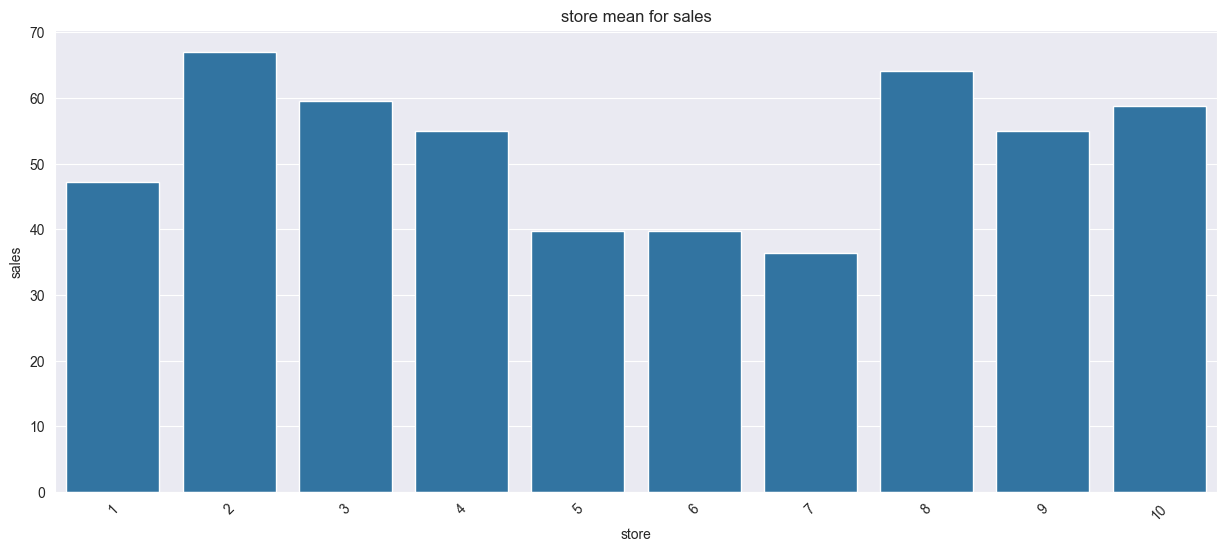

In [51]:
bivariate_Analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_Analyzer.analyze(data, 'store', 'sales')

## Sales by Item

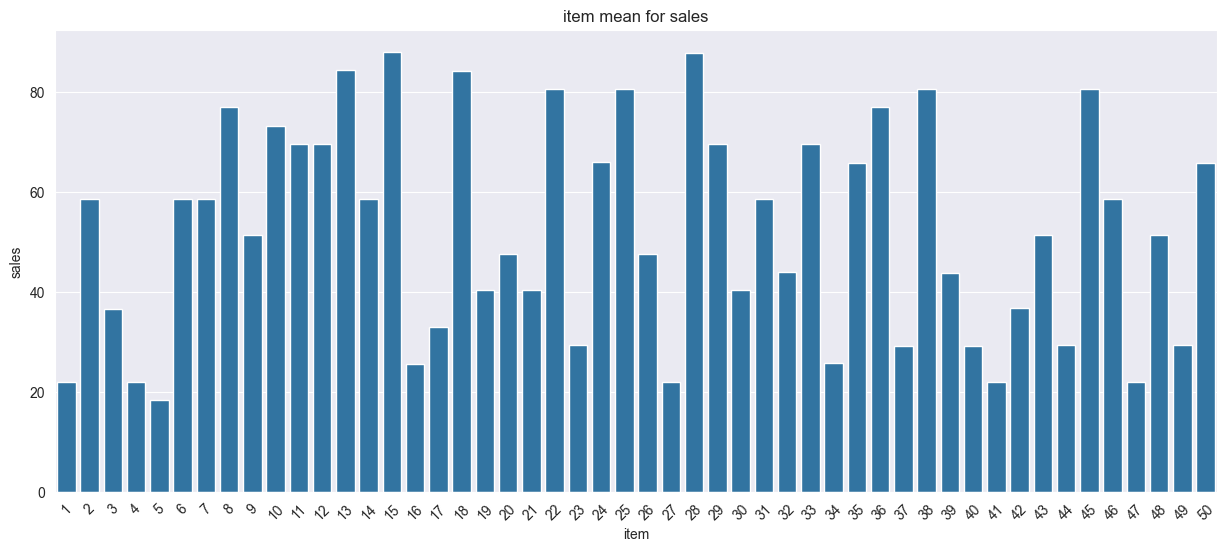

In [52]:
bivariate_Analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_Analyzer.analyze(data, 'item', 'sales')

# Sales by Store and Item

In [53]:
data.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                              
                 sum        mean median        std
store item                                        
1     1      36468.0   19.971522   19.0   6.741022
      2      97050.0   53.148959   52.0  15.005779
      3      60638.0   33.208105   33.0  10.072529
      4      36440.0   19.956188   20.0   6.640618
      5      30335.0   16.612815   16.0   5.672102
      6      96889.0   53.060789   52.0  14.826416
      7      96383.0   52.783680   52.0  15.073838
      8     126856.0   69.472070   68.5  18.751980
      9      84918.0   46.504929   46.0  13.247496
      10    121163.0   66.354326   65.0  18.283007
      11    115436.0   63.217963   62.0  17.230417
      12    115465.0   63.233844   62.0  17.636872
      13    139067.0   76.159365   75.0  20.374852
      14     97050.0   53.148959   52.0  14.769971
      15    145497.0   79.680723   78.0  21.725799
      16     42605.0   23.332421   23.0   7.614738
      17     54729.0   29.972070   29.0   9.116824
      18    139407.0   76.345564   75.0  21.053109
      19     66972.0   36.676889   36.0  11.100620
      20     78318.0   42.890471   42.0  12.181551
      21     66058.0   36.176342   35.0  10.840796
      22    132899.0   72.781490   72.0  19.808007
      23     48334.0   26.469880   26.0   8.460734
      24    109560.0   60.000000   59.0  16.642840
      25    132816.0   72.736035   72.0  19.799388
      26     78949.0   43.236035   43.0  12.848906
      27     36613.0   20.050931   20.0   6.640278
      28    145289.0   79.566813   79.0  21.460002
      29    115196.0   63.086528   62.0  17.277086
      30     66317.0   36.318182   36.0  10.938036
      31     96793.0   53.008215   52.0  14.954009
      32     72744.0   39.837897   39.0  11.464108
      33    114592.0   62.755750   62.0  17.178149
      34     42500.0   23.274918   23.0   7.499406
      35    108638.0   59.495071   58.0  16.482759
      36    126560.0   69.309967   68.0  19.170648
      37     48251.0   26.424425   26.0   8.312726
      38    133927.0   73.344469   72.0  19.948156
      39     72483.0   39.694962   39.0  11.783459
      40     48286.0   26.443593   26.0   8.208805
      41     36525.0   20.002738   20.0   6.684883
      42     60451.0   33.105696   33.0   9.623903
      43     84439.0   46.242607   45.0  13.345104
      44     48561.0   26.594195   26.0   8.364186
      45    132788.0   72.720701   72.0  19.730340
      46     96495.0   52.845016   52.0  14.932417
      47     36181.0   19.814348   19.0   6.554391
      48     84993.0   46.546002   45.0  13.416421
      49     48319.0   26.461665   26.0   8.299193
      50    108360.0   59.342826   59.0  16.380065
2     1      51445.0   28.173604   28.0   8.681013
      2     137528.0   75.316539   74.0  20.332268
      3      85808.0   46.992333   46.0  13.546306
      4      51557.0   28.234940   28.0   8.655292
      5      42985.0   23.540526   23.0   7.757471
      6     136850.0   74.945235   74.0  20.319213
      7     137057.0   75.058598   74.0  20.456365
      8     180939.0   99.090361   98.0  26.278864
      9     119563.0   65.478094   65.0  18.191487
      10    171822.0   94.097481   92.0  24.927277
      11    163080.0   89.309967   88.0  24.163105
      12    163154.0   89.350493   89.0  24.078885
      13    197031.0  107.903067  107.0  28.479705
      14    137607.0   75.359803   75.0  20.077175
      15    205569.0  112.578861  111.0  29.676051
      16     60167.0   32.950164   32.0   9.843779
      17     77730.0   42.568456   42.0  12.276137
      18    197422.0  108.117196  106.0  28.581275
      19     94623.0   51.819825   51.0  14.432644
      20    111346.0   60.978094   60.0  16.976134
      21     94507.0   51.756298   50.0  14.693145
      22    188096.0  103.009858  102.0  27.062058
      23     68601.0   37.569003   37.0  11.089124
      24    154813.0   84.782585   84.0  22.555608
      25    188856.0  103.426068  102.0  27.691476
      26    111575.0   61.103505   60

# Feature Engineering